<h1> Training</h1>
If you have annotations from the previous version of FRCNN, go to the 'convertFromCSV' notebook and follow the provided instructions. After doing so, return to this notebook.
<br> <br>
Before training, split your data into some training images and some validation images. To do this, add each training image as well as its corresponding annotation .xml file into the images/train folder in the FRCNN2 folder. Similarly, add each validation image as well as its corresponding annotation .xml file into the images/test folder. A 90% training image, 10% validation image split is recommended
<br> <br>
Run the cell below to define all imports and helper functions for this notebook

In [1]:
from library import *
from tqdm.auto import tqdm

Populate CLASSES with the classes you would like to find. As indictated, reserve the first entry for the background. 

Training parameters are defined below

In [2]:
BATCH_SIZE = 4 # increase / decrease according to GPU memory
RESIZE_TO = 512 # resize the image for training and transforms
NUM_EPOCHS = 5 # number of epochs to train for
SAVE_PLOTS_EPOCH = 1 # save loss plots after these many epochs
SAVE_MODEL_EPOCH = 5 # save model after these many epochs

Run the cell below to load in your images and annotations. This cell will print the number of images found in the testing and training folder

In [3]:
# prepare the final datasets and data loaders
train_dataset = getDataset(TRAIN_DIR, RESIZE_TO, RESIZE_TO, get_train_transform())
valid_dataset = getDataset(VALID_DIR, RESIZE_TO, RESIZE_TO, get_valid_transform())
[train_loader, valid_loader] = get_loaders(train_dataset, valid_dataset, BATCH_SIZE, collate_fn)

NUM_CLASSES = len(train_dataset.classes)

print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

Number of training samples: 60
Number of validation samples: 50



Run the cell below to visualize your data to ensure that bounding boxes match images as expected. There will be gridlines in the image shown

['background', 'Frog']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


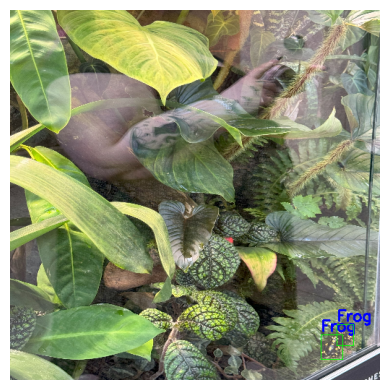

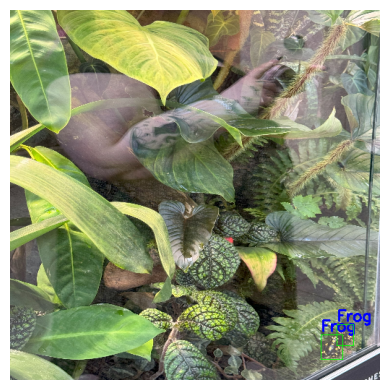

In [4]:
INDEX_TO_VIS = 0
print(train_dataset.classes)
visualize_sample(TRAIN_DIR, RESIZE_TO, INDEX_TO_VIS)

To start training from the default COCO weights run the cell below

In [ ]:
model = create_model(num_classes=NUM_CLASSES)

To load a model to continue training run the cell below

In [ ]:
model_name = 'model5.pth'
model = load_model_train(model_name, MODEL_DIR, NUM_CLASSES=NUM_CLASSES)

Train your model by running the cell below! After the specified number of epochs passes, the model will be saved and a plot of the training/validation loss over time will be shown 

In [ ]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# name to save the trained model with
MODEL_NAME = 'model'
tq1 = tqdm(range(0,NUM_EPOCHS))
fig = plt.figure
[train_loss_list, val_loss_list] = train_model(model, train_loader, valid_loader,
                                               DEVICE, MODEL_NAME, NUM_EPOCHS,
                                               MODEL_DIR, PLOT_DIR, SAVE_MODEL_EPOCH,
                                               SAVE_PLOTS_EPOCH, tq1, fig)
# Plot Validation & Training Loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)

<h1> Inferencing</h1>
Run the cells below to create bounding boxes for new data. Images with bounding boxes overlaid will be present in the outputs folder following inferencing as well. CSV files will also be created, one for the class of each object detected and one for the bounding boxes of said objects. Each row of the CSV file will correspond to each frame of the movie inferenced (in the case of movie inferencing) or each image in the ordering defined by the output images (in the case of image inferencing). Each bounding box is of the form [xmin ymin xmax ymax]
<br> <br>
First define the confidence threshold you would like to use for inferencing

In [5]:
detection_threshold = 0.2# 0.9 by default

Load your model by running the cell below

In [6]:
model_name = 'model5.pth'
model = load_model(model_name, MODEL_DIR, NUM_CLASSES)

<h2> Image Inferencing </h2>

In [7]:
# Path to folder of images for inferencing
folderName = './test_data/test_images/'
[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
inf_fig = plt.figure()
results = inference_images(folderName, model, OUT_DIR, detection_threshold, train_dataset.classes, tqdm, inf_fig)


  0%|          | 0/7 [00:00<?, ?it/s]

TEST PREDICTIONS COMPLETE


<Figure size 640x480 with 0 Axes>

In [8]:
# Path to folder of images for inferencing
folderName = './test_data/test_images/'
[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
results = inference_images_fast(folderName, model, OUT_DIR, detection_threshold, train_dataset.classes, tqdm,
                                batch_size=1)

Inference Progress:   0%|          | 0/7 [00:00<?, ?it/s]

TEST PREDICTIONS COMPLETE


<h2> Movie Inferencing (POSSIBLY BROKEN ATM) </h2>
Run inferencing on your data by running the cell below. This will output a video to 'outpy.avi' which overlays bounding boxes with their respective classes. The variables 'bboxes' and 'classes' contain inferencing information for each frame. 

In [ ]:
# Path to video for inferencing
vidName = 'agar_4.avi'
DIR_TEST = './test_data/' + vidName
# Output file name
outputName = 'outpy.avi'

[boxFileName, classFileName, scoreFileName] = ['boxes', 'classes', 'scores']
[bboxes, classes, scores] = inference_video(DIR_TEST, OUT_DIR, outputName, model, detection_threshold, CLASSES, save_detections=True)
saveBoxesClassesScores(boxFileName, classFileName, scoreFileName, bboxes, classes, scores, OUT_DIR)